## Lead Scoring Case Study

#### Problem statement:
An education company named X Education sells online courses to industry professionals. People who are interested in the courses, would browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Though X Education gets a lot of leads, its lead conversion rate is very poor.  
The goal is to identify the most promising leads, i.e. the leads that are most likely to convert into paying customers. We need to build a logistic regression model and assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. This model will help the sales team to focus on the hot leads.

### Step 1: Import Libraries and the data set

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

In [3]:
# import the data set
leads=pd.read_csv("Leads.csv")
leads.head(20)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


### Step 2 : Inspect the data frame

In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Many categorical columns has one of the values as Select which means no selection is done. Checking the count of 
# Select in all the columns.
leads[leads=="Select"].count()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

### Step 3: Data Preparation:

In [8]:
#Replacing all occurrences of Select with null value
for col in leads.columns:
    leads[col].replace({'Select': None},inplace=True)

#### Handling missing values

In [9]:
# checking the percentage of null in all the columns
(leads.isnull().sum()/len(leads))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
# drop columns which have 30% missing values
leads=leads.dropna(thresh=len(leads)*.7,axis=1)
leads.shape

(9240, 27)

In [11]:
(leads.isnull().sum()/len(leads))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

### Impute for missing values

In [12]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [13]:
# Impute using mode for Lead Source 
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Google')

In [14]:
# percentage of missing values is very less for TotalVisits, Page Views Per Visit, Last Activity. 
#Hence we can remove the missing rows
leads=leads[(~leads["TotalVisits"].isnull())]
leads=leads[(~leads["Page Views Per Visit"].isnull())]
leads=leads[(~leads["Last Activity"].isnull())]

Impute using mode for Country,What is your current occupation, What matters most to you in choosing a course

In [15]:
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [16]:
leads['Country'] = leads['Country'].replace(np.nan, 'India')

In [17]:
leads['What is your current occupation'].value_counts()

Unemployed              5502
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [18]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [19]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6399
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [20]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [21]:
# check for count of missing values 
leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [22]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.445238,481.350104,2.362820
std,23337.138926,0.485464,4.854853,545.066142,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


#### Checking for Outliers

In [23]:
# Checking for outliers in the continuous variables
num_leads = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [24]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
95%,10.000000,1556.900000,6.000000
99%,17.000000,1838.960000,9.000000


Visualizing outliers using box plot

<AxesSubplot:>

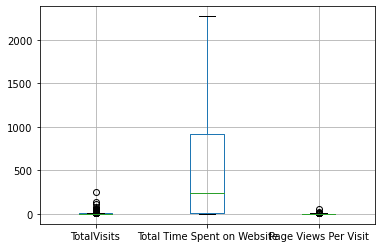

In [25]:
num_leads.boxplot()

In [26]:
# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = leads['TotalVisits'].quantile(0.99)
leads = leads[leads["TotalVisits"] < nn_quartile_total_visits]

In [27]:
# Removing values beyond 99% for Page Views Per Visit

nn_quartile_page_views = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads["Page Views Per Visit"] < nn_quartile_page_views]

In [28]:
# Removing unncessary columns 
# since Prospect ID and Lead Number is not required for model building, we are removing it
leads=leads.drop(["Prospect ID","Lead Number"],axis=1)

##### Mapping Yes & No to 1 and 0 

In [29]:
vars_list=["Do Not Email","Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview"]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to map binary values
leads[vars_list] = leads[vars_list].apply(binary_map)

##### Converting values in Country column to India and others

In [30]:
# Since there are lot of categories in Country column, we are classifying it as India and Others only
def map_country(x):
    if(x!="India"):
        return "Others"
    else:
        return "India"

# Applying the function to return Country as either India or Others 
leads["Country"] = leads["Country"].apply(map_country)

##### One hot encoding

In [31]:
# Creating dummy variables for categorical features and dropping the first level for each category.
dummy1 = pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity','Country','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']], drop_first=True)

# Adding the results to the leads dataframe
leads = pd.concat([leads, dummy1], axis=1)

Dropping redundant columns

In [32]:
leads=leads.drop(['Lead Origin','Lead Source','Last Activity','Country','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity'], axis=1)
leads.head(20)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.00,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,1,2.0,1640,2.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,2.0,71,2.00,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,4.0,58,4.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Step 4: Test-Train Split

In [33]:
# Splitting the data into 70%, 30%. 
# Training set 70%
# Test set 30%

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Adding all variables to X except for Converted
X = leads.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [36]:
# Adding target variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [37]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

Scaling all numeric variables which do not lie between 0-1 using MinMax Scaler

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8736,0,0,0.0000,0.000000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4453,0,0,0.1250,0.693222,0.250,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
625,1,0,0.0000,0.000000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1525,0,0,0.1875,0.344630,0.375,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3381,0,0,0.2500,0.360035,0.500,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [40]:
### Checking the % of Converted Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

37.97795771479982

The data has converted rate of 38%. Hence the data is balanced.

#####  Correlation matrix

In [41]:
# Checking the correlation values

In [42]:
X_train.corr()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.005177,-0.036654,-0.061586,-0.002847,-0.010359,NaN,NaN,NaN,-0.003660,-0.003660,-0.006341,NaN,NaN,NaN,NaN,0.053936,0.087733,-0.010216,-0.015978,0.112572,-0.015551,-0.072455,NaN,-0.003660,-0.041771,0.026167,-0.003660,0.043901,-0.031039,-0.019963,NaN,-0.003660,0.008728,-0.007322,-0.003660,-0.003660,-0.003660,NaN,-0.063918,0.640045,-0.040226,0.062091,-0.220700,-0.005177,-0.020258,-0.004325,-0.056570,0.057069,-0.003660,-0.018593,0.007988,0.270728,-0.005177,NaN,0.049589,-0.008187,0.001051,0.014201,0.035399,-0.047269,NaN,-0.003660,0.282013,-0.034553,0.062091,-0.187918,-0.003660,-0.003660,-0.011583,0.120312,-0.012942,0.026188,-0.003660,-0.023621,-0.007651,0.248964,-0.003660
Do Not Call,-0.005177,1.000000,0.009379,0.008518,-0.006961,-0.000643,NaN,NaN,NaN,-0.000227,-0.000227,-0.000394,NaN,NaN,NaN,NaN,-0.012024,-0.018998,0.030958,-0.000992,-0.011231,-0.000966,0.006838,NaN,-0.000227,-0.008893,-0.006586,-0.000227,-0.000227,0.037891,-0.001940,NaN,-0.000227,-0.002220,-0.000455,-0.000227,-0.000227,-0.000227,NaN,-0.004140,-0.003448,-0.003155,-0.000321,0.004566,-0.000321,-0.001953,-0.000966,0.022481,-0.004699,-0.000227,-0.011763,-0.001784,-0.001478,-0.000321,NaN,-0.003199,-0.000508,-0.000788,-0.002690,0.005953,-0.005077,NaN,-0.000227,-0.001460,-0.002427,-0.000321,-0.011912,-0.000227,-0.000227,-0.000719,0.023450,-0.002629,-0.003173,-0.000227,-0.010001,-0.001092,-0.001289,-0.000227
TotalVisits,-0.036654,0.009379,1.000000,0.354416,0.727448,0.086374,NaN,NaN,NaN,0.031658,-0.000194,0.039077,NaN,NaN,NaN,NaN,0.266020,0.426315,-0.268788,-0.060434,0.125030,-0.058818,0.232420,Na

In [43]:
import numpy as np

# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] >= 0.9)]
to_drop

['Lead Source_Facebook',
 'Last Notable Activity_Email Marked Spam',
 'Last Notable Activity_Resubscribed to emails']

##### Removing columns with high correlation

In [44]:
X_train = X_train.drop(['Last Notable Activity_Email Marked Spam','Lead Source_Facebook',
 'Last Notable Activity_Resubscribed to emails'],1)

In [45]:
X_test = X_test.drop(['Last Notable Activity_Email Marked Spam','Lead Source_Facebook',
 'Last Notable Activity_Resubscribed to emails'],1)

### Step 6: Model Building

#### Running the First Training Model

In [46]:
import statsmodels.api as sm

In [47]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6160
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 07 May 2022   Deviance:                   1.4865e+05
Time:                        10:49:39   Pearson chi2:                 7.27e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    1.421e+16    8.9e+07    1.6e+08      0.000    1.42e+16    1.42e+16
Do Not Email                                                            -7.894e+14   4.64e+06   -1.7e+08      0.000   -7.89e+14   -7.89e+14
Do Not Call                                                              2.434e+16   4.76e+07   5.12e+08      0.000    2.43e+16    2.43e+16
TotalVisits                                                              1.597e+15    7.7e+06   2.07e+08      0.000     1.6e+15     1.6e+15
Total Time Spent on Website                                             -4.367e+14   4.13e+06  -1.06e+08      0.000   -4.37e+14   -4.37e+14
Page Views Per Visit                                                    -5.427e+14   6.58e+06  -8.25e+07      0.000   -5.43e+14   -5.43e+14
Search                                                                  -3.735e+14   2.44e+07  -1.53e+07      0.000   -3.73e+14   -3.73e+14
Magazine                                                                  -43.0366    2.2e-07  -1.95e+08      0.000     -43.037     -43.037
Newspaper Article                                                         -72.6577      4e-07  -1.81e+08      0.000     -72.658     -72.658
X Education Forums                                                         77.1551   3.92e-07   1.97e+08      0.000      77.155      77.155
Newspaper                                                               -1.486e+15   6.73e+07  -2.21e+07      0.000   -1.49e+15   -1.49e+15
Digital Advertisement                                                    4.508e+15   6.73e+07    6.7e+07      0.000    4.51e+15    4.51e+15
Through Recommendations                                                  3.336e+14      4e+07   8.34e+06      0.000    3.34e+14    3.34e+14
Receive More Updates About Our Courses                                    133.0842   6.61e-07   2.01e+08      0.000     133.084     133.084
Update me on Supply Chain Content                                          82.0383   8.22e-07   9.98e+07      0.000      82.038      82.038
Get updates on DM Content                                                 201.1029   3.95e-07   5.09e+08      0.000     201.103     201.103
I agree to pay the amount through cheque                                  137.2016   5.81e-07   2.36e+08      0.000     137.202     137.202
A free copy of Mastering The Interview                                   4.385e+13    2.7e+06   1.62e+07      0.000    4.39e+13    4.39e+13
Lead Origin_Landing Page Submission                                     -5.611e+13   2.74e+06  -2.05e+07      0.000   -5.61e+13   -5.61e+13
Lea

### Step 7: Feature Selection Using RFE

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [49]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [50]:
#columns supported by rfe
rfe.support_

array([ True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True, False, False])

In [51]:
# rfe ranking and selection
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 14),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Search', False, 34),
 ('Magazine', False, 52),
 ('Newspaper Article', False, 51),
 ('X Education Forums', False, 53),
 ('Newspaper', False, 7),
 ('Digital Advertisement', False, 23),
 ('Through Recommendations', False, 29),
 ('Receive More Updates About Our Courses', False, 58),
 ('Update me on Supply Chain Content', False, 60),
 ('Get updates on DM Content', False, 55),
 ('I agree to pay the amount through cheque', False, 50),
 ('A free copy of Mastering The Interview', False, 48),
 ('Lead Origin_Landing Page Submission', False, 37),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 22),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Live Chat', False, 54),
 ('Lead Source_NC_EDM', False, 24),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Orga

In [52]:
#adding only supported columns 
col = X_train.columns[rfe.support_]

##### Assessing the model with StatsModels

In [53]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6208
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.7
Date:                Sat, 07 May 2022   Deviance:                       5189.5
Time:                        10:49:54   Pearson chi2:                 6.24e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6478      0.102    -25.919      0.000      -2.848      -2.448
Do Not Email                                            -1.2215      0.197     -6.203      0.000      -1.607      -0.836
TotalVisits                                              1.1686      0.251      4.665      0.000       0.678       1.660
Total Time Spent on Website                              4.5497      0.169     26.930      0.000       4.219       4.881
Lead Origin_Lead Add Form                                4.2596      0.235     18.104      0.000       3.798       4.721
Lead Origin_Lead Import                                  1.5658      0.546      2.866      0.004       0.495       2.636
Lead Source_Olark Chat                                   1.4679      0.121     12.083      0.000       1.230       1.706
Lead Source_Welingak Website                             1.8143      0.753      2.410      0.016       0.339       3.290
Last Activity_Converted to Lead                         -0.9489      0.203     -4.676      0.000      -1.347      -0.551
Last Activity_Email Bounced                             -1.3125      0.437     -3.002      0.003      -2.170      -0.455
Last Activity_Olark Chat Conversation                   -1.4348      0.160     -8.953      0.000      -1.749      -1.121
What is your current occupation_Housewife               24.5300   3.11e+04      0.001      0.999    -6.1e+04    6.11e+04
What is your current occupation_Working Professional     2.8043      0.191     14.677      0.000       2.430       3.179
Last Notable Activity_Had a Phone Conversation          23.8912   2.03e+04      0.001      0.999   -3.98e+04    3.99e+04
Last Notable Activity_SMS Sent                           1.5298      0.081     18.816      0.000       1.370       1.689
Last Notable Activity_Unreachable                        1.5186      0.544      2.792      0.005       0.453       2.585
========================================================================================================================
"""

### Checking VIF

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Total Time Spent on Website,2.00
1,TotalVisits,1.90
0,Do Not Email,1.84
8,Last Activity_Email Bounced,1.80
3,Lead Origin_Lead Add Form,1.45
5,Lead Source_Olark Chat,1.41
13,Last Notable Activity_SMS Sent,1.40
9,Last Activity_Olark Chat Conversation,1.39
6,Lead Source_Welingak Website,1.31
11,What is your current occupation_Working Profes...,1.17


##### VIF seems to be low (<5) for all the columns

#### Dropping columns with high p-value (>0.05) one by one and checking summary statitics

In [56]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

##### Checking the summary statistics again

In [57]:
X_train_sm=sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6209
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.5
Date:                Sat, 07 May 2022   Deviance:                       5201.1
Time:                        10:49:55   Pearson chi2:                 6.25e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6364      0.102    -25.869      0.000      -2.836      -2.437
Do Not Email                                            -1.2238      0.197     -6.218      0.000      -1.610      -0.838
TotalVisits                                              1.1561      0.250      4.619      0.000       0.666       1.647
Total Time Spent on Website                              4.5473      0.169     26.953      0.000       4.217       4.878
Lead Origin_Lead Add Form                                4.2500      0.235     18.072      0.000       3.789       4.711
Lead Origin_Lead Import                                  1.5547      0.546      2.847      0.004       0.484       2.625
Lead Source_Olark Chat                                   1.4592      0.121     12.029      0.000       1.221       1.697
Lead Source_Welingak Website                             1.8146      0.753      2.411      0.016       0.339       3.290
Last Activity_Converted to Lead                         -0.9575      0.203     -4.720      0.000      -1.355      -0.560
Last Activity_Email Bounced                             -1.3170      0.437     -3.013      0.003      -2.174      -0.460
Last Activity_Olark Chat Conversation                   -1.4385      0.160     -8.978      0.000      -1.752      -1.124
What is your current occupation_Working Professional     2.7997      0.191     14.655      0.000       2.425       3.174
Last Notable Activity_Had a Phone Conversation          22.8856   1.23e+04      0.002      0.999   -2.41e+04    2.42e+04
Last Notable Activity_SMS Sent                           1.5234      0.081     18.754      0.000       1.364       1.683
Last Notable Activity_Unreachable                        1.5129      0.544      2.782      0.005       0.447       2.579
========================================================================================================================
"""

##### Dropping the next highest p-value column

In [58]:
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

##### Checking the summary statistics again

In [59]:
X_train_sm=sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6210
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.1
Date:                Sat, 07 May 2022   Deviance:                       5218.2
Time:                        10:49:55   Pearson chi2:                 6.26e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6310      0.102    -25.878      0.000      -2.830      -2.432
Do Not Email                                            -1.2275      0.197     -6.242      0.000      -1.613      -0.842
TotalVisits                                              1.1829      0.250      4.740      0.000       0.694       1.672
Total Time Spent on Website                              4.5405      0.168     26.975      0.000       4.211       4.870
Lead Origin_Lead Add Form                                4.2467      0.235     18.066      0.000       3.786       4.707
Lead Origin_Lead Import                                  1.5494      0.546      2.837      0.005       0.479       2.620
Lead Source_Olark Chat                                   1.4569      0.121     12.028      0.000       1.219       1.694
Lead Source_Welingak Website                             1.8152      0.753      2.411      0.016       0.340       3.291
Last Activity_Converted to Lead                         -0.9637      0.203     -4.753      0.000      -1.361      -0.566
Last Activity_Email Bounced                             -1.3197      0.437     -3.019      0.003      -2.176      -0.463
Last Activity_Olark Chat Conversation                   -1.4438      0.160     -9.013      0.000      -1.758      -1.130
What is your current occupation_Working Professional     2.7994      0.191     14.667      0.000       2.425       3.174
Last Notable Activity_SMS Sent                           1.5148      0.081     18.670      0.000       1.356       1.674
Last Notable Activity_Unreachable                        1.5032      0.544      2.765      0.006       0.438       2.569
========================================================================================================================
"""

##### Now all columns have p-value <=0.05 Hence no need to remove anymore columns

### Making predictions using train set

In [60]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [61]:
y_train_pred[:10]

array([0.23610681, 0.89837175, 0.02362965, 0.8759908 , 0.33169018,
       0.06799134, 0.88178043, 0.45390121, 0.06799134, 0.61172325])

##### Creating a new data frame with Converted flag and Converted probability

In [62]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred, 'Lead_Id':y_train.index})

In [63]:
y_train_pred_final.head(10)

,Converted,Converted_Prob,Lead_Id
0,0,0.236107,8736
1,1,0.898372,4453
2,0,0.023630,625
3,0,0.875991,1525
4,1,0.331690,3381
5,0,0.067991,1236
6,1,0.881780,6066
7,0,0.453901,6004
8,0,0.067991,4404
9,1,0.611723,1930


### Step 8: Finding Optimal Cutoff Point

###### Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [64]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.236107,8736,1,1,1,0,0,0,0,0,0,0
1,1,0.898372,4453,1,1,1,1,1,1,1,1,1,0
2,0,0.023630,625,1,0,0,0,0,0,0,0,0,0
3,0,0.875991,1525,1,1,1,1,1,1,1,1,1,0
4,1,0.331690,3381,1,1,1,1,0,0,0,0,0,0


In [65]:
y_train_pred_final

,Converted,Converted_Prob,Lead_Id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.236107,8736,1,1,1,0,0,0,0,0,0,0
1,1,0.898372,4453,1,1,1,1,1,1,1,1,1,0
2,0,0.023630,625,1,0,0,0,0,0,0,0,0,0
3,0,0.875991,1525,1,1,1,1,1,1,1,1,1,0
4,1,0.331690,3381,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6219,0,0.020928,381,1,0,0,0,0,0,0,0,0,0
6220,0,0.149346,85,1,1,0,0,0,0,0,0,0,0
6221,0,0.047007,8365,1,0,0,0,0,0,0,0,0,0
6222,0,0.351801,7210,1,1,1,1,0,0,0,0,0,0


In [66]:
from sklearn import metrics

In [67]:
# calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380945  1.000000  0.000000
0.1   0.1  0.587243  0.968368  0.352712
0.2   0.2  0.739878  0.915647  0.631716
0.3   0.3  0.800129  0.831717  0.780690
0.4   0.4  0.809769  0.770139  0.834155
0.5   0.5  0.809447  0.693378  0.880872
0.6   0.6  0.791934  0.574441  0.925772
0.7   0.7  0.778117  0.498524  0.950169
0.8   0.8  0.761086  0.420919  0.970413
0.9   0.9  0.708869  0.252636  0.989618


In [68]:
import matplotlib.pyplot as plt

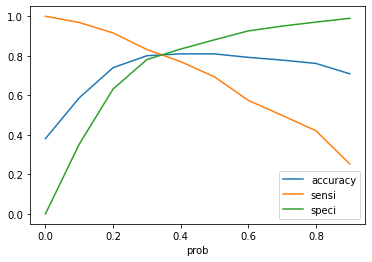

In [69]:
# plotting accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### Three curves meet at 0.36. Hence taking 0.36 as the optimal cut-off

In [70]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.36 else 0)


##### Calculating the lead score

In [71]:
# Calculating the lead score
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,Lead_Id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.236107,8736,1,1,1,0,0,0,0,0,0,0,0,24
1,1,0.898372,4453,1,1,1,1,1,1,1,1,1,0,1,90
2,0,0.023630,625,1,0,0,0,0,0,0,0,0,0,0,2
3,0,0.875991,1525,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.331690,3381,1,1,1,1,0,0,0,0,0,0,0,33
5,0,0.067991,1236,1,0,0,0,0,0,0,0,0,0,0,7
6,1,0.881780,6066,1,1,1,1,1,1,1,1,1,0,1,88
7,0,0.453901,6004,1,1,1,1,1,0,0,0,0,0,1,45
8,0,0.067991,4404,1,0,0,0,0,0,0,0,0,0,0,7
9,1,0.611723,1930,1,1,1,1,1,1,1,0,0,0,1,61


##### Accuracy

In [72]:
# checking the overall accuracy score.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8083226221079691

##### Creating the confusion matrix

In [73]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3140,  713],
       [ 480, 1891]])

In [74]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

##### Sensitivity

In [75]:
# calculating sensitivity of the logistic regression model
TP / float(TP+FN)

0.7975537747785745

##### Specificity

In [76]:
# calculating specificity
TN / float(TN+FP)

0.8149493900856476

##### False Positive Rate

In [77]:
# Calculating false postive rate - predicting converted as 1 when lead has not acrually converted
print(FP/ float(TN+FP))

0.18505060991435246


##### Positive Predictive Rate

In [78]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7261904761904762


##### Negative predictive value

In [79]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8674033149171271


## Precision and Recall

##### Precision
TP / TP + FP

In [80]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7261904761904762

##### Recall
TP / TP + FN

In [81]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7975537747785745

#### Summary of metrics for train set

In [82]:
def get_metrics(actual, predicted):
    confusion = confusion_matrix(actual, predicted)

    # Let's check the overall accuracy.
    Accuracy = metrics.accuracy_score(actual, predicted)

    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    TP = confusion[1,1] # true positive 

    # Calculate the different Metrics
    Sensitivity = TP / float(TP+FN) # calculate Sensitivity
    Specificity = TN / float(TN+FP) # calculate specificity
    Precision   = TP / float(TP+FP) # calculate Precision
    Recall      = TN / float(TN+FP) # calculate Recall
    FPR = (FP/ float(TN+FP))        # Calculate False Postive Rate - predicting conversion when customer does not convert
    PPV = (TP / float(TP+FP))       # positive predictive value 
    NPV = (TN / float(TN+ FN))      # Negative predictive value
    
    F1 = 2*(Precision*Recall)/(Precision+Recall)

    # Print the Metrics
    print (f'The Confusion Matrix is \n {confusion}')
    print (f'The Accuracy is    : {round (Accuracy,2)} ({Accuracy})')
    print (f'The Sensitivity is : {round (Sensitivity,2)} ({Sensitivity})')
    print (f'The Specificity is : {round (Specificity,2)} ({Specificity})')
    print (f'The Precision is   : {round (Precision, 2)} ({Precision})')
    print (f'The Recall is      : {round (Recall, 2)} ({Recall})')
    print (f'The f1 score is    : {round (F1, 2)} ({F1})')
    print (f'The False Positive Rate is       : {round (FPR, 2)} ({FPR})')
    print (f'The Positive Predictive Value is : {round (PPV, 2)} ({PPV})')
    print (f'The Negative Predictive Value is : {round (NPV, 2)} ({NPV})')

In [83]:
get_metrics(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

The Confusion Matrix is 
 [[3140  713]
 [ 480 1891]]
The Accuracy is    : 0.81 (0.8083226221079691)
The Sensitivity is : 0.8 (0.7975537747785745)
The Specificity is : 0.81 (0.8149493900856476)
The Precision is   : 0.73 (0.7261904761904762)
The Recall is      : 0.81 (0.8149493900856476)
The f1 score is    : 0.77 (0.7680139857616285)
The False Positive Rate is       : 0.19 (0.18505060991435246)
The Positive Predictive Value is : 0.73 (0.7261904761904762)
The Negative Predictive Value is : 0.87 (0.8674033149171271)


##### All the metrics are good for training set

### Step 9: Making predictions on the test set

Applying scaling on the test set

In [84]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [85]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
2146,0,0.5625,0.123239,0,0,0,0,0,0,0,0,0,0
400,1,0.2500,0.595951,0,0,0,0,0,0,0,0,0,0
2207,0,0.0000,0.000000,0,0,1,0,0,0,0,0,0,0
574,0,0.4375,0.169454,0,0,0,0,0,0,0,0,0,0
5268,1,0.1875,0.023327,0,0,0,0,0,1,0,0,0,0


In [86]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [87]:
y_test_pred = res.predict(X_test_sm)

In [88]:
y_test_pred[:10]

2146    0.196855
400     0.297983
2207    0.236107
574     0.206838
5268    0.007764
2177    0.127685
6120    0.284379
8307    0.099803
8220    0.883638
95      0.375108
dtype: float64

In [89]:
# creating a data frame for predicted values
y_pred_1 = pd.DataFrame(y_test_pred)

In [90]:
# checking the head
y_pred_1.head()

,0
2146,0.196855
400,0.297983
2207,0.236107
574,0.206838
5268,0.007764


In [91]:
# creating a data frame for y_test
y_test_df = pd.DataFrame({'Converted':y_test, 'Lead_Id':y_test.index})

In [92]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [93]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [94]:
y_pred_final.head()

,Converted,Lead_Id,0
0,0,2146,0.196855
1,1,400,0.297983
2,0,2207,0.236107
3,0,574,0.206838
4,0,5268,0.007764


In [95]:
# Renaming the column name to Converted_Prob
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [96]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Converted','Converted_Prob','Lead_Id'], axis=1)

In [97]:
# Calculating the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,Converted_Prob,Lead_Id,lead_score
0,0,0.196855,2146,20
1,1,0.297983,400,30
2,0,0.236107,2207,24
3,0,0.206838,574,21
4,0,0.007764,5268,1
5,0,0.127685,2177,13
6,1,0.284379,6120,28
7,0,0.099803,8307,10
8,1,0.883638,8220,88
9,0,0.375108,95,38


In [98]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Converted_Prob,Lead_Id,lead_score
0,0,0.196855,2146,20
1,1,0.297983,400,30
2,0,0.236107,2207,24
3,0,0.206838,574,21
4,0,0.007764,5268,1


In [99]:
y_pred_final.describe()

,Converted,Converted_Prob,Lead_Id,lead_score
count,2668.000000,2668.000000,2668.000000,2668.000000
mean,0.377061,0.379750,4638.431784,38.010870
std,0.484741,0.317512,2689.960526,31.723382
min,0.000000,0.006058,0.000000,1.000000
25%,0.000000,0.109243,2285.250000,11.000000
50%,0.000000,0.236107,4652.500000,24.000000
75%,1.000000,0.623525,7004.500000,62.000000
max,1.000000,0.999839,9236.000000,100.000000


Using the same probability cut-off 0.36 in test set to make predictions for converted flag

In [100]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [101]:
y_pred_final.head()

,Converted,Converted_Prob,Lead_Id,lead_score,final_predicted
0,0,0.196855,2146,20,0
1,1,0.297983,400,30,0
2,0,0.236107,2207,24,0
3,0,0.206838,574,21,0
4,0,0.007764,5268,1,0


#### Accuracy

In [102]:
# checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8129685157421289

##### Confusion Matrix

In [103]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1363,  299],
       [ 200,  806]])

In [104]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

##### Sensitivity

In [105]:
# calculating the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8011928429423459

##### Specificity

In [106]:
# calculating specificity
TN / float(TN+FP)

0.8200962695547533

## Precision and Recall

##### Precision
TP / TP + FP

In [107]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7294117647058823

##### Recall
TP / TP + FN

In [108]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8011928429423459

##### Summary of metrics for test set

In [109]:
get_metrics(y_pred_final.Converted, y_pred_final.final_predicted)

The Confusion Matrix is 
 [[1363  299]
 [ 200  806]]
The Accuracy is    : 0.81 (0.8129685157421289)
The Sensitivity is : 0.8 (0.8011928429423459)
The Specificity is : 0.82 (0.8200962695547533)
The Precision is   : 0.73 (0.7294117647058823)
The Recall is      : 0.82 (0.8200962695547533)
The f1 score is    : 0.77 (0.7721003750588171)
The False Positive Rate is       : 0.18 (0.17990373044524668)
The Positive Predictive Value is : 0.73 (0.7294117647058823)
The Negative Predictive Value is : 0.87 (0.872040946896993)


##### The performance metrics is good for both training and test set. Hence we conclude the model is good.